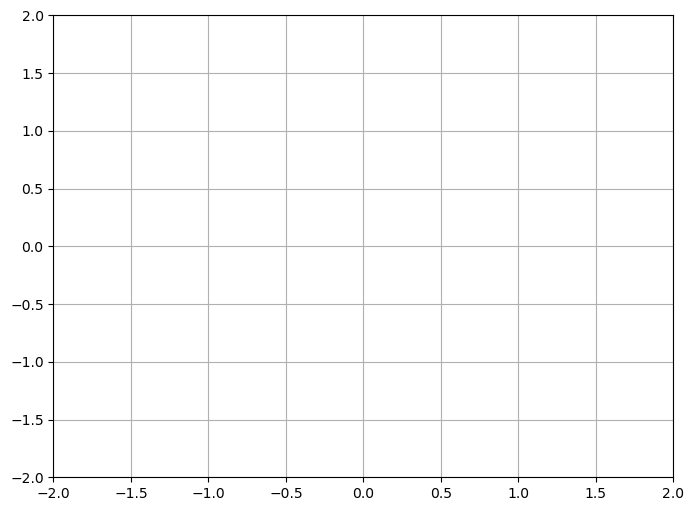

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def create_grid_animation(ntrain0, ndim=2, nn1=20, nn2=20, 
                        a0=-2, a1=2, b0=-2, b1=2):
    # Calculate points
    alist = []
    blist = []
    iskip = int(np.sqrt(float(nn1*nn2) / ntrain0))
    if iskip < 1:
        iskip = 1
        
    i = 0
    for ii in range(0, nn1, iskip):
        for jj in range(0, nn2, iskip):
            if i < ntrain0:
                alist.append((a1-a0)*float(ii)/float(nn1-1)+a0)
                blist.append((b1-b0)*float(jj)/float(nn2-1)+b0)
                i += 1
    
    points = np.column_stack((alist, blist))
    
    # Create figure and animation
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(a0, a1)
    ax.set_ylim(b0, b1)
    ax.grid(True)
    scat = ax.scatter([], [], c='blue', alpha=0.6)
    
    def init():
        scat.set_offsets(np.zeros((0, 2)))
        return scat,
    
    def animate(frame):
        if frame < len(points):
            scat.set_offsets(points[:frame+1])
        return scat,
    
    anim = FuncAnimation(fig, animate, init_func=init,
                        frames=len(points), interval=50, 
                        blit=True)
    
    plt.show()
    return anim

# Example usage
ntrain0 = 100
anim = create_grid_animation(ntrain0)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
matplotlib.use('TkAgg')  # Try forcing TkAgg backend

def create_grid_animation(ntrain0=100):
    # Set up the figure and axis
    fig, ax = plt.subplots()
    
    # Generate points
    nn1 = nn2 = 20
    a0 = b0 = -2
    a1 = b1 = 2
    
    # Calculate grid points
    iskip = int(np.sqrt(float(nn1*nn2) / ntrain0))
    iskip = max(1, iskip)
    
    points = []
    for ii in range(0, nn1, iskip):
        for jj in range(0, nn2, iskip):
            if len(points) < ntrain0:
                x = (a1-a0)*float(ii)/float(nn1-1)+a0
                y = (b1-b0)*float(jj)/float(nn2-1)+b0
                points.append([x, y])
    
    points = np.array(points)
    
    # Set up plot
    ax.set_xlim(a0-0.5, a1+0.5)
    ax.set_ylim(b0-0.5, b1+0.5)
    ax.grid(True)
    scatter = ax.scatter([], [])
    
    def animate(frame):
        if frame > 0:
            current_points = points[:frame]
            scatter.set_offsets(current_points)
        return scatter,
    
    anim = FuncAnimation(
        fig=fig,
        func=animate,
        frames=len(points)+1,
        interval=100,
        blit=True,
        repeat=False
    )
    
    plt.show()
    return anim

# Run the animation
anim = create_grid_animation()

2025-02-22 06:02:39.513 python[30277:5741815] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-22 06:02:39.513 python[30277:5741815] +[IMKInputSession subclass]: chose IMKInputSession_Modern
